In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [20]:
reeses = cv2.imread("../DATA/reeses_puffs.png",0)

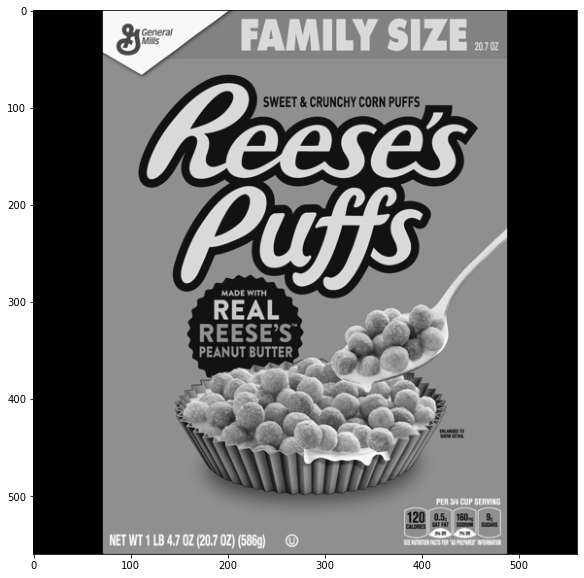

In [21]:
display(resses)

In [22]:
cereals = cv2.imread("../DATA/many_cereals.jpg",0)

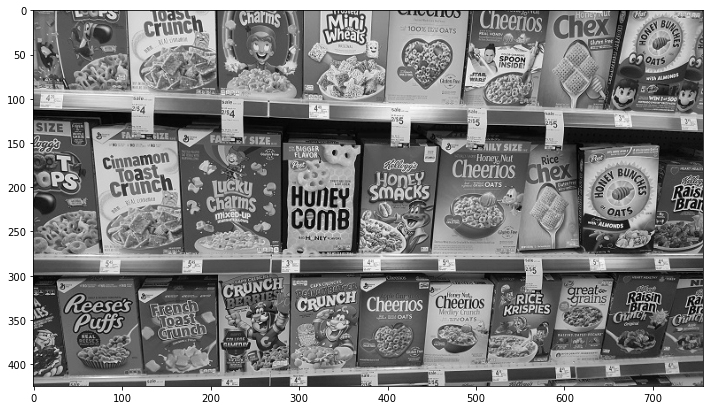

In [23]:
display(cereals)

In [24]:
#brute force detection with orb
orb = cv2.ORB_create()

In [26]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [27]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [29]:
matches = bf.match(des1,des2)

In [32]:
matches = sorted(matches, key=lambda x:x.distance)

In [35]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

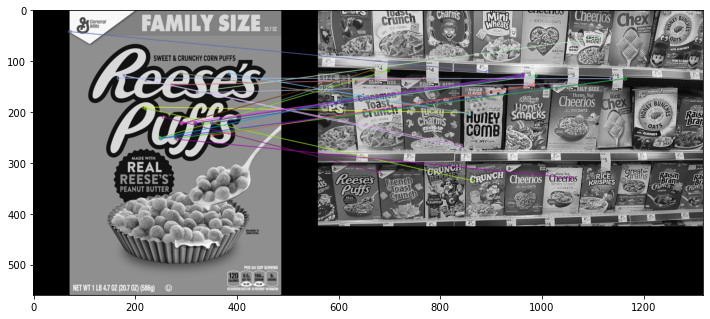

In [36]:
display(reeses_matches)